<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/uae_auto_market_sales_data_for_advanced_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAE AUTO MARKET SALES PREDICTION**

---


We will use classification algorithms to predict UAE auto market sales based on the various features provided in the dataset


---

This dataset is sourced from: https://www.kaggle.com/datasets/azharsaleem/uae-auto-market-sales-data-for-advanced-analytics

---

The algorithms demonstrate an average accuracy level of up to 87%.

---

The most influential features contributing to the prediction are:

1. The price of the vehicle
2. The brand of the vehicle
3. The model of the vehicle

These features significantly impact the classification process, contributing to the model's predictive accuracy.


##Dataset Description


Here is a brief description of the dataset.

| Column              | Description                                          |
|---------------------|------------------------------------------------------|
| price               | The price of the vehicle                             |
| brand               | The brand of the vehicle                             |
| model               | The model of the vehicle                             |
| trim                | The trim of the vehicle                              |
| kilometers          | The mileage of the vehicle                           |
| year                | The manufacturing year of the vehicle               |
| vehicle_age_years   | The age of the vehicle in years                      |
| regional_specs      | The regional specifications of the vehicle           |
| doors               | The number of doors of the vehicle                   |
| body_type           | The body type of the vehicle                         |
| fuel_type           | The fuel type of the vehicle                         |
| seating_capacity    | The seating capacity of the vehicle                  |
| transmission_type   | The transmission type of the vehicle                 |
| engine_capacity_cc  | The engine capacity of the vehicle in cubic centimeters (cc) |
| horsepower          | The horsepower of the vehicle                        |
| no_of_cylinders     | The number of cylinders of the vehicle               |
| exterior_color      | The exterior color of the vehicle                    |
| interior_color      | The interior color of the vehicle                    |
| warranty            | The warranty information of the vehicle              |
| address             | The address of the vehicle                           |
| country             | The country where the vehicle is located             |
| city                | The city where the vehicle is located                |
| area_name           | The name of the area where the vehicle is located    |
| location_name       | The name of the location where the vehicle is located|
| latitude            | The latitude coordinate of the vehicle's location    |
| longitude           | The longitude coordinate of the vehicle's location   |
| seller_type         | The type of seller (e.g., individual, dealership)    |


# Preset Parameters

In [44]:
data_dir =  f'azharsaleem/uae-auto-market-sales-data-for-advanced-analytics'  # Dataset location

view_hist_feat = [0, 1, 2, -2, -1]  # Features selected for histogram visualization

target_switcher = -1  # Switch target to a feature which is in the last column

feat = [-7]  # Features to drop

data_nan = 'drop'  # Fill NaN values:
                   #   Choose 'mode' to fill NaN values with the mode of the feature
                   #   Choose 'mean' to fill NaN values with the mean of the feature
                   #   Choose 'drop' to drop rows containing NaN values

balanced_dataset = False  # Whether to balance the dataset or not

confidence_interval_limit = [-3, 3]  # Define the limits of the confidence interval [-m, m] and eliminate the outliers

correlation_percentage_threshold = 0.7  # Set the correlation threshold between features for removal

pre_proc = 'X'  # Data preprocessing:
                #   Choose 'XY' to standardize both 'X' and 'Y',
                #   Choose 'X' to standardize only 'X',
                #   Choose 'Y' to standardize only 'Y',

target_values_label = True  # True if target values are float or integers

####### Neural Network Parameters #######
activation = 'relu'
epoch = 10
num_nodes = [2, 4]
dropout_prob = [0.05, 0.1]
lr = [0.01, 0.1]
batch_size = [2, 4]


# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/azharsaleem/uae-auto-market-sales-data-for-advanced-analytics
License(s): Apache 2.0
  0% 0.00/279k [00:00<?, ?B/s]
100% 279k/279k [00:00<00:00, 97.4MB/s]


In [9]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['uae-auto-market-sales-data-for-advanced-analytics.zip']

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['dubizzle_cars_dataset.csv']

# Import the helper classes

In [11]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [12]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.5 MB/s eta 0:00:00


In [13]:
! pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.0 MB/s eta 0:00:00


In [14]:
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [15]:
from aka_data_analysis.aka_nn import aka_nn

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [45]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')
df.head()

price       brand      model           trim  kilometers  year  \
0  129900       Dodge        Ram  1500 SLT Crew       47566  2021   
1  319900  Alfa Romeo    Stelvio   Quadrifoglio        8914  2020   
2  149900        Audi         Q5         S-line       72205  2019   
3   79900  Alfa Romeo  GIULIETTA         Veloce       49193  2021   
4  154900         GAC        GS8             GL          30  2024   

   vehicle_age_years regional_specs  doors      body_type  ... interior_color  \
0                  3      GCC Specs      4  Pick Up Truck  ...        Unknown   
1                  4      GCC Specs      5            SUV  ...          Black   
2                  5      GCC Specs      5            SUV  ...          Brown   
3                  3      GCC Specs      4      Hatchback  ...          Black   
4                  0      GCC Specs      5            SUV  ...    Other Color   

   warranty                         address country   city  area_name  \
0       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   
1       Yes     Abu Hail, Deira, Dubai, UAE     UAE  Dubai      Deira   
2       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   
3       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   
4       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   

  location_name   latitude  longitude                     seller_type  
0   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
1      Abu Hail  25.275416  55.346450  Dealership/Certified Pre-Owned  
2   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
3   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
4   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  

[5 rows x 27 columns]

In [46]:
df.describe()

price    kilometers         year  vehicle_age_years  \
count    9953.000000  9.953000e+03  9953.000000        9953.000000   
mean   162009.236311  8.187313e+04  2018.118155           5.881845   
std    187120.064955  9.029117e+04     5.163806           5.163806   
min      1000.000000  0.000000e+00  1956.000000           0.000000   
25%     44900.000000  1.894100e+04  2016.000000           2.000000   
50%     92000.000000  6.800000e+04  2019.000000           5.000000   
75%    205000.000000  1.225000e+05  2022.000000           8.000000   
max    999900.000000  2.580000e+06  2024.000000          68.000000   

             doors  seating_capacity  no_of_cylinders     latitude  \
count  9953.000000       9953.000000      9953.000000  9580.000000   
mean      3.964533          4.597408         5.751432    25.117984   
std       0.948349          1.795174         2.195505     0.220519   
min       2.000000          0.000000         0.000000    23.651535   
25%       4.000000          4.000000         4.000000    25.078641   
50%       4.000000          5.000000         6.000000    25.168752   
75%       5.000000          5.000000         8.000000    25.217623   
max       5.000000          8.000000        12.000000    25.868224   

         longitude  
count  9580.000000  
mean     55.232448  
std       0.262072  
min      53.701969  
25%      55.207465  
50%      55.263450  
75%      55.379422  
max      56.347195

In [47]:
# view_hist_feat = [0,1,2,-2,-1]
fig = aka_plot.Plot_histogram_Features(df,view_hist_feat )
if fig is not None:
    fig.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               9953 non-null   int64  
 1   brand               9953 non-null   object 
 2   model               9953 non-null   object 
 3   trim                9941 non-null   object 
 4   kilometers          9953 non-null   int64  
 5   year                9953 non-null   int64  
 6   vehicle_age_years   9953 non-null   int64  
 7   regional_specs      9953 non-null   object 
 8   doors               9953 non-null   int64  
 9   body_type           9953 non-null   object 
 10  fuel_type           9953 non-null   object 
 11  seating_capacity    9953 non-null   int64  
 12  transmission_type   9953 non-null   object 
 13  engine_capacity_cc  7992 non-null   object 
 14  horsepower          9495 non-null   object 
 15  no_of_cylinders     9953 non-null   int64  
 16  exteri

In [49]:
df.describe()

price    kilometers         year  vehicle_age_years  \
count    9953.000000  9.953000e+03  9953.000000        9953.000000   
mean   162009.236311  8.187313e+04  2018.118155           5.881845   
std    187120.064955  9.029117e+04     5.163806           5.163806   
min      1000.000000  0.000000e+00  1956.000000           0.000000   
25%     44900.000000  1.894100e+04  2016.000000           2.000000   
50%     92000.000000  6.800000e+04  2019.000000           5.000000   
75%    205000.000000  1.225000e+05  2022.000000           8.000000   
max    999900.000000  2.580000e+06  2024.000000          68.000000   

             doors  seating_capacity  no_of_cylinders     latitude  \
count  9953.000000       9953.000000      9953.000000  9580.000000   
mean      3.964533          4.597408         5.751432    25.117984   
std       0.948349          1.795174         2.195505     0.220519   
min       2.000000          0.000000         0.000000    23.651535   
25%       4.000000          4.000000         4.000000    25.078641   
50%       4.000000          5.000000         6.000000    25.168752   
75%       5.000000          5.000000         8.000000    25.217623   
max       5.000000          8.000000        12.000000    25.868224   

         longitude  
count  9580.000000  
mean     55.232448  
std       0.262072  
min      53.701969  
25%      55.207465  
50%      55.263450  
75%      55.379422  
max      56.347195

# Null Values

In [50]:
df.isnull().sum()

price                    0
brand                    0
model                    0
trim                    12
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc    1961
horsepower             458
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
area_name              619
location_name         5320
latitude               373
longitude              373
seller_type              0
dtype: int64

In [51]:
aka_plot.plot_missing_values(df)

# Clean Dataset

## Drop Duplicate data

In [52]:
df.drop_duplicates()

price       brand         model           trim  kilometers  year  \
0     129900       Dodge           Ram  1500 SLT Crew       47566  2021   
1     319900  Alfa Romeo       Stelvio   Quadrifoglio        8914  2020   
2     149900        Audi            Q5         S-line       72205  2019   
3      79900  Alfa Romeo     GIULIETTA         Veloce       49193  2021   
4     154900         GAC           GS8             GL          30  2024   
...      ...         ...           ...            ...         ...   ...   
9948  215000       Lexus         LX570       Platinum      191000  2016   
9949   78000     Porsche       Cayenne            GTS      165000  2014   
9950  173000      Toyota  Land Cruiser            GXR      134000  2018   
9951   63000      Toyota         Prado       Tx-l MID      290000  2011   
9952   90000      Nissan        Patrol             SE      166000  2017   

      vehicle_age_years regional_specs  doors      body_type  ...  \
0                     3      GCC Specs      4  Pick Up Truck  ...   
1                     4      GCC Specs      5            SUV  ...   
2                     5      GCC Specs      5            SUV  ...   
3                     3      GCC Specs      4      Hatchback  ...   
4                     0      GCC Specs      5            SUV  ...   
...                 ...            ...    ...            ...  ...   
9948                  8      GCC Specs      4            SUV  ...   
9949                 10      GCC Specs      4            SUV  ...   
9950                  6      GCC Specs      4            SUV  ...   
9951                 13      GCC Specs      5            SUV  ...   
9952                  7      GCC Specs      4            SUV  ...   

     interior_color        warranty  \
0           Unknown             Yes   
1             Black             Yes   
2             Brown             Yes   
3             Black             Yes   
4       Other Color             Yes   
...             ...             ...   
9948          Beige  Does not apply   
9949        Unknown  Does not apply   
9950          Beige             Yes   
9951          Beige  Does not apply   
9952        Unknown             Yes   

                                                address country     city  \
0                        Al Khabaisi, Deira, Dubai, UAE     UAE    Dubai   
1                           Abu Hail, Deira, Dubai, UAE     UAE    Dubai   
2                        Al Khabaisi, Deira, Dubai, UAE     UAE    Dubai   
3                        Al Khabaisi, Deira, Dubai, UAE     UAE    Dubai   
4                        Al Khabaisi, Deira, Dubai, UAE     UAE    Dubai   
...                                                 ...     ...      ...   
9948  Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...     UAE  Sharjah   
9949  Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...     UAE  Sharjah   
9950  Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...     UAE  Sharjah   
9951  Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...     UAE  Sharjah   
9952  Souq Al Haraj / Tasjeel Village, Saif Zone (Sh...     UAE  Sharjah   

                                              area_name  \
0                                                 Deira   
1                                                 Deira   
2                                                 Deira   
3                                                 Deira   
4                                                 Deira   
...                                                 ...   
9948  Saif Zone (Sharjah International Airport Free ...   
9949  Saif Zone (Sharjah International Airport Free ...   
9950  Saif Zone (Sharjah International Airport Free ...   
9951  Saif Zone (Sharjah International Airport Free ...   
9952  Saif Zone (Sharjah International Airport Free ...   

                        location_name   latitude  longitude  \
0                         Al Khabaisi  25.266173  55.337772   
1                            Abu Hail  25.275416  55.346450 

## Swap the target and the last feature

In [53]:
# target_switcher = -1
df = aka_clean.swap_features(df,target_switcher)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


price       brand      model           trim  kilometers  year  \
0  129900       Dodge        Ram  1500 SLT Crew       47566  2021   
1  319900  Alfa Romeo    Stelvio   Quadrifoglio        8914  2020   
2  149900        Audi         Q5         S-line       72205  2019   
3   79900  Alfa Romeo  GIULIETTA         Veloce       49193  2021   
4  154900         GAC        GS8             GL          30  2024   

   vehicle_age_years regional_specs  doors      body_type  ... interior_color  \
0                  3      GCC Specs      4  Pick Up Truck  ...        Unknown   
1                  4      GCC Specs      5            SUV  ...          Black   
2                  5      GCC Specs      5            SUV  ...          Brown   
3                  3      GCC Specs      4      Hatchback  ...          Black   
4                  0      GCC Specs      5            SUV  ...    Other Color   

   warranty                         address country   city  area_name  \
0       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   
1       Yes     Abu Hail, Deira, Dubai, UAE     UAE  Dubai      Deira   
2       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   
3       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   
4       Yes  Al Khabaisi, Deira, Dubai, UAE     UAE  Dubai      Deira   

  location_name   latitude  longitude                     seller_type  
0   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
1      Abu Hail  25.275416  55.346450  Dealership/Certified Pre-Owned  
2   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
3   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
4   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  

[5 rows x 27 columns]

### Drop feature(s)


In [54]:
# feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

price       brand      model           trim  kilometers  year  \
0  129900       Dodge        Ram  1500 SLT Crew       47566  2021   
1  319900  Alfa Romeo    Stelvio   Quadrifoglio        8914  2020   
2  149900        Audi         Q5         S-line       72205  2019   
3   79900  Alfa Romeo  GIULIETTA         Veloce       49193  2021   
4  154900         GAC        GS8             GL          30  2024   

   vehicle_age_years regional_specs  doors      body_type  ... exterior_color  \
0                  3      GCC Specs      4  Pick Up Truck  ...          White   
1                  4      GCC Specs      5            SUV  ...            Red   
2                  5      GCC Specs      5            SUV  ...          Green   
3                  3      GCC Specs      4      Hatchback  ...           Grey   
4                  0      GCC Specs      5            SUV  ...         Silver   

   interior_color warranty                         address   city  area_name  \
0         Unknown      Yes  Al Khabaisi, Deira, Dubai, UAE  Dubai      Deira   
1           Black      Yes     Abu Hail, Deira, Dubai, UAE  Dubai      Deira   
2           Brown      Yes  Al Khabaisi, Deira, Dubai, UAE  Dubai      Deira   
3           Black      Yes  Al Khabaisi, Deira, Dubai, UAE  Dubai      Deira   
4     Other Color      Yes  Al Khabaisi, Deira, Dubai, UAE  Dubai      Deira   

  location_name   latitude  longitude                     seller_type  
0   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
1      Abu Hail  25.275416  55.346450  Dealership/Certified Pre-Owned  
2   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
3   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  
4   Al Khabaisi  25.266173  55.337772  Dealership/Certified Pre-Owned  

[5 rows x 26 columns]

##  Convert categorical variables into numerical representations

In [55]:
# data_nan = 'drop'  # Choose 'mode' to fill NaN values with the mode of the feature
#                    # Choose 'mean' to fill NaN values with the mean of the feature
#                    # Choose 'drop' to drop rows containing NaN values

mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping,data_nan)

## Balance Dataset

In [56]:
aka_plot.plot_pie(df,-1)

In [57]:
# balanced_dataset = False

if balanced_dataset:
  df = aka_clean.balance_df(df,'j')
  aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [58]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [59]:

# confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

# correlation_percentage_threshold = .7      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 941 outliers and remove 4 feature(s)
The filtered dataset's shape is (2666, 22) 


## Graph the features that are highly correlated


In [60]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [61]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [62]:
# pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
#                                               #                'X' to standardize only 'X',
#                                               #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [63]:
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



In [64]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: xlabel='validation-accuracy', ylabel='model'>

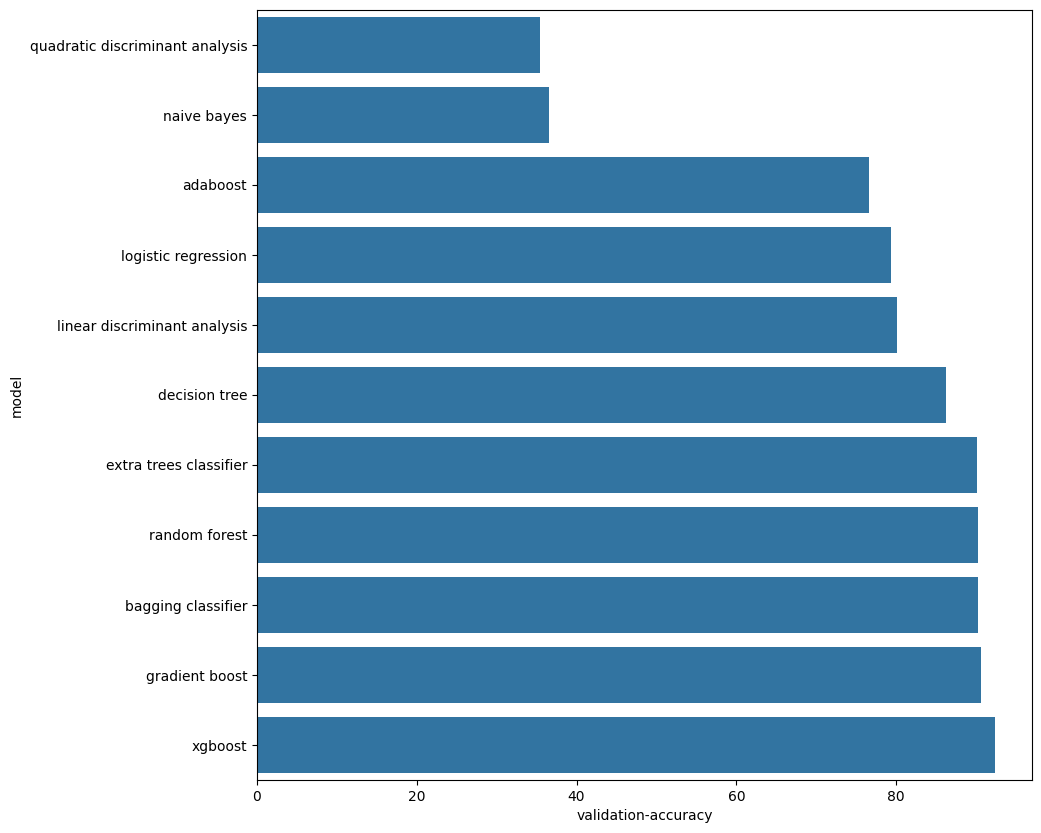

In [65]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')


## Confusion Matrix

In [66]:
# target_values_label = True

y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)

if target_values_label:
  Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]
else:
  Label = ['v_'+str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [67]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [68]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

## Plot Important Features by Weight



In [69]:
# aka_plot.plot_important_features(model,df_filtered)

 99%|===================| 5557/5598 [01:15<00:00]       

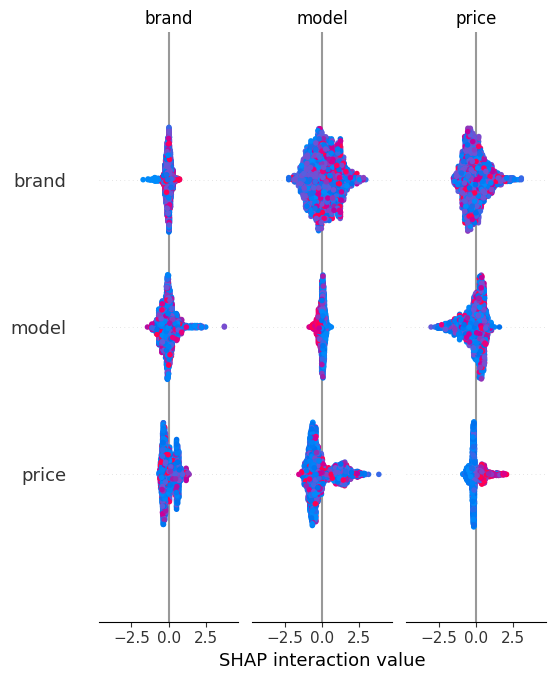

In [70]:
feat_names = df_filtered.columns[:-1]
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=feat_names)

# Neural Net

In [71]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)
y_pred = myNN.predict(model)

2 nodes, dropout 0.05, lr 0.01, batch size 2
25/25 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.2313
2 nodes, dropout 0.05, lr 0.01, batch size 4
25/25 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.2313
2 nodes, dropout 0.05, lr 0.1, batch size 2
25/25 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.2313
2 nodes, dropout 0.05, lr 0.1, batch size 4
25/25 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.2313
2 nodes, dropout 0.1, lr 0.01, batch size 2
25/25 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.2300
2 nodes, dropout 0.1, lr 0.01, batch size 4
25/25 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.2313
2 nodes, dropout 0.1, lr 0.1, batch size 2
25/25 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.2313
2 nodes, dropout 0.1, lr 0.1, batch size 4
25/25 [==============================] 

## Confusion Matrix

In [72]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
# Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [73]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [74]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Plot Important Features by Weight


PermutationExplainer explainer: 1867it [02:40, 11.29it/s]                          


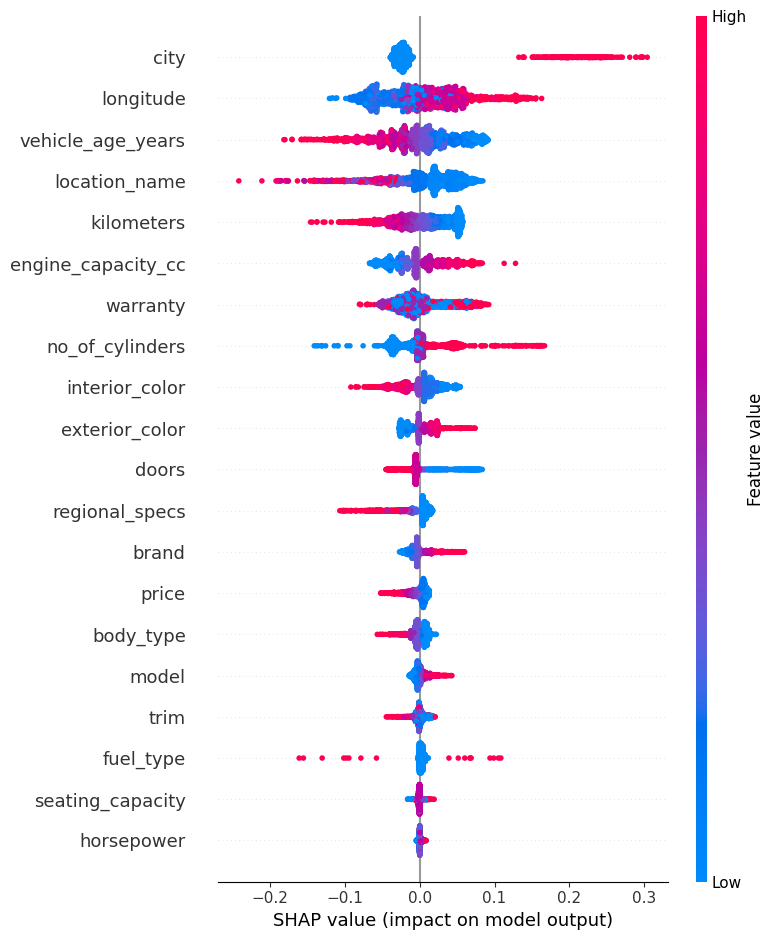

In [75]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=feat_names)